#Import Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

In [7]:
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

red_wine["wine_type"] = "red"
white_wine["wine_type"] = "white"

data = pd.concat([red_wine, white_wine], axis=0)


# Dataset Analysis

In [8]:
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:\n", data.head())
print("\nNull values:\n", data.isnull().sum())
print("\nQuality value counts:\n", data["quality"].value_counts())

Dataset Shape: (6497, 13)

First 5 rows:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4  

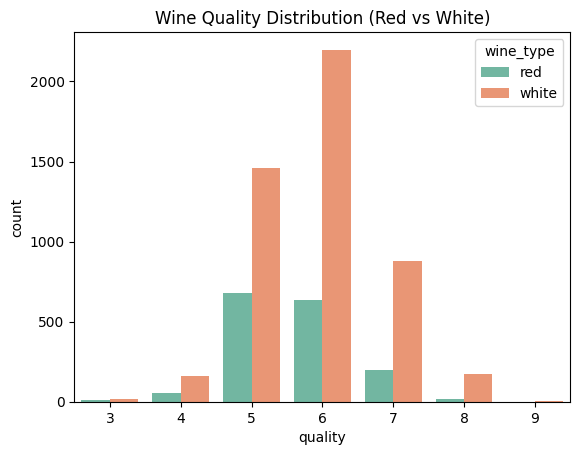

In [9]:
sns.countplot(x="quality", data=data, hue="wine_type", palette="Set2")
plt.title("Wine Quality Distribution (Red vs White)")
plt.show()


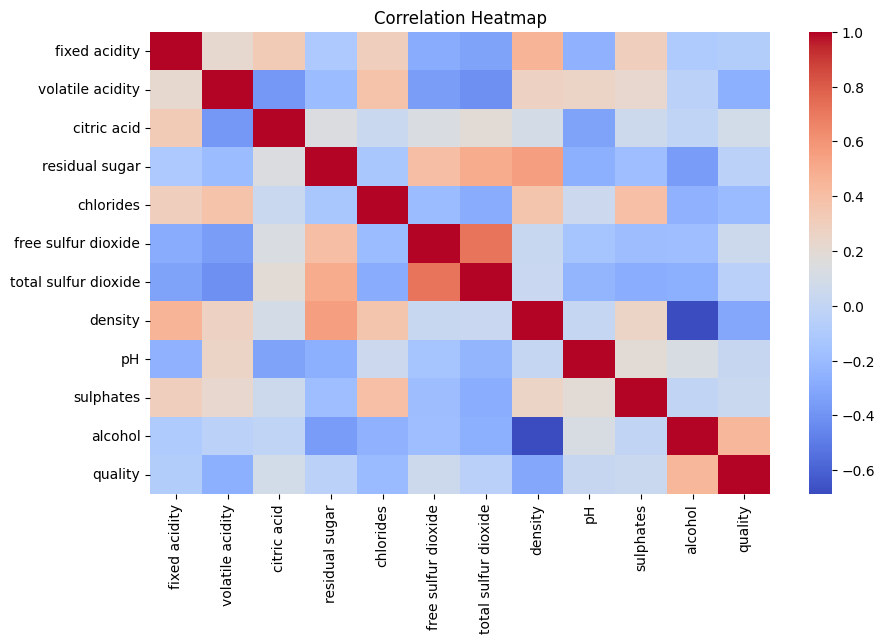

In [10]:
plt.figure(figsize=(10, 6))
numeric_data = data.drop(columns=["wine_type"])   # drop the string column
sns.heatmap(numeric_data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Data Preprocessing

In [11]:
data["good_quality"] = [1 if q >= 7 else 0 for q in data["quality"]]

X = data.drop(["quality", "good_quality", "wine_type"], axis=1)
y = data["good_quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [12]:
model = LogisticRegression(max_iter=1000, solver="liblinear", class_weight="balanced")
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Model Evaluation

In [13]:
print("\nModel Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Evaluation
Accuracy: 0.7176923076923077

Confusion Matrix:
 [[739 305]
 [ 62 194]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80      1044
           1       0.39      0.76      0.51       256

    accuracy                           0.72      1300
   macro avg       0.66      0.73      0.66      1300
weighted avg       0.82      0.72      0.74      1300



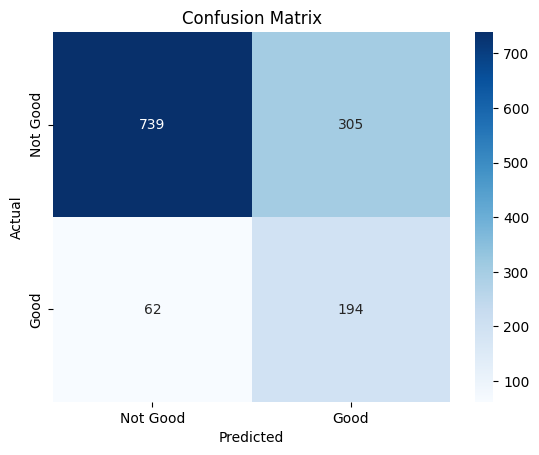

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Good", "Good"], yticklabels=["Not Good", "Good"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

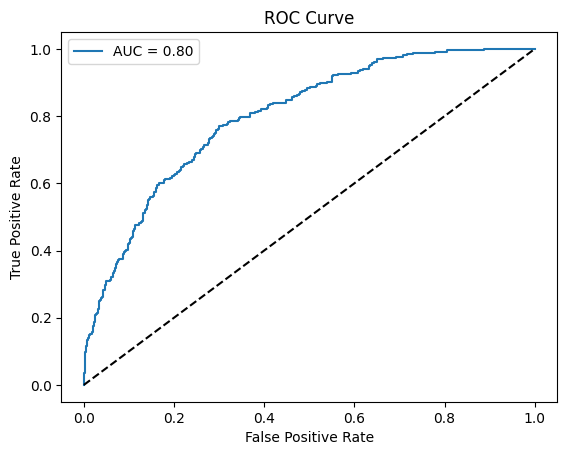

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
